In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [80]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [81]:
!ls

drive  sample_data


In [82]:
train=pd.read_csv("/content/drive/My Drive/Datasets/train_ctrUa4K.csv")

In [83]:
test=pd.read_csv("/content/drive/My Drive/Datasets/test_lAUu6dG.csv")

In [84]:
train_orignal=train.copy()

In [85]:
test_orignal=test.copy()

In [86]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [87]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [88]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [89]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [90]:
train.shape

(614, 13)

In [91]:
test.shape

(367, 12)

In [92]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [93]:
#Doing Data Normalization to print proportions
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

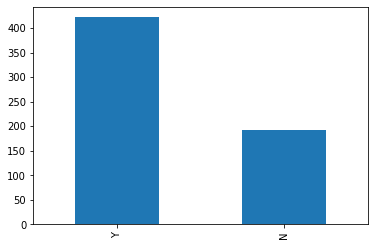

In [94]:
train['Loan_Status'].value_counts().plot.bar()
plt.show()

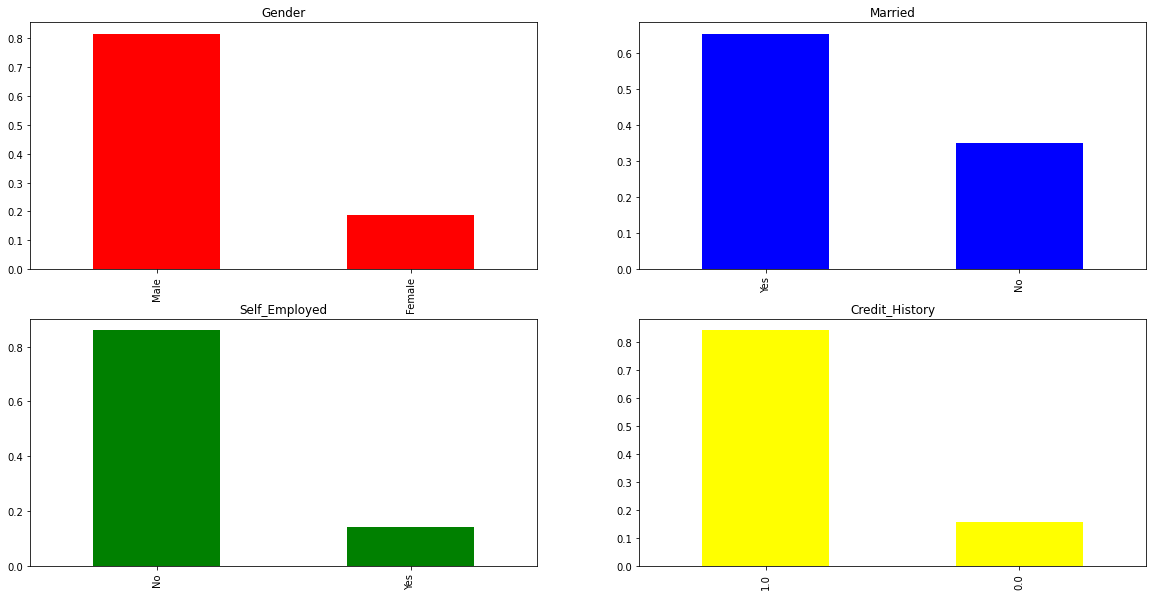

In [95]:
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender',color='Red')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married',color='Blue')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed',color='Green')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History',color='Yellow')
plt.show()


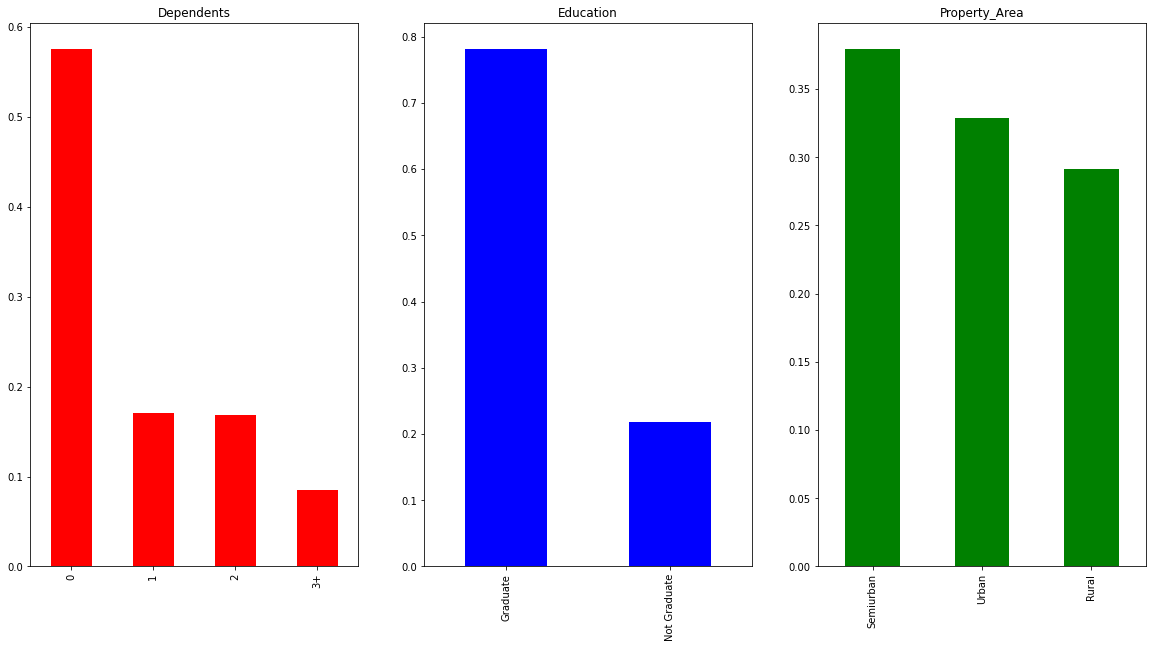

In [96]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Dependents',color='Red')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Education',color='Blue')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Property_Area',color='Green')

plt.show()

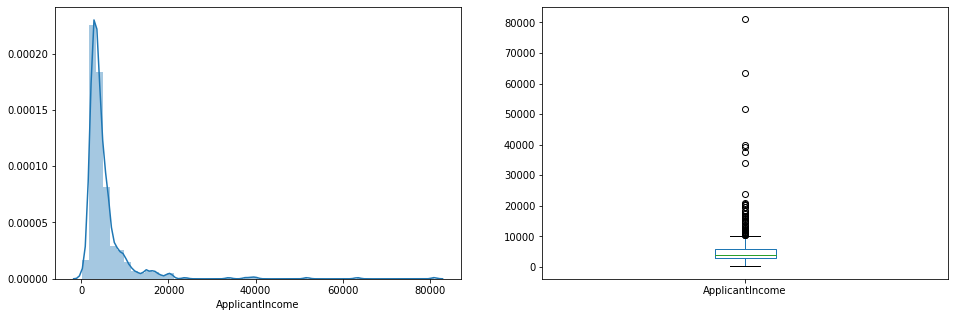

In [97]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()


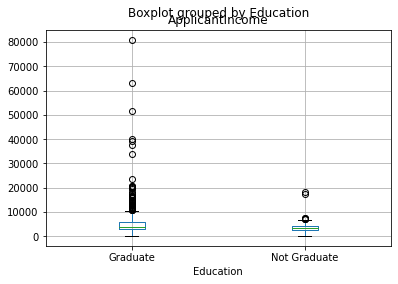

In [98]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.show()

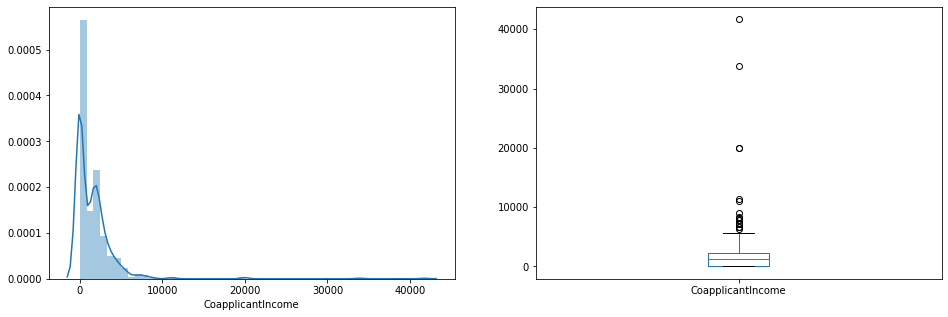

In [99]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

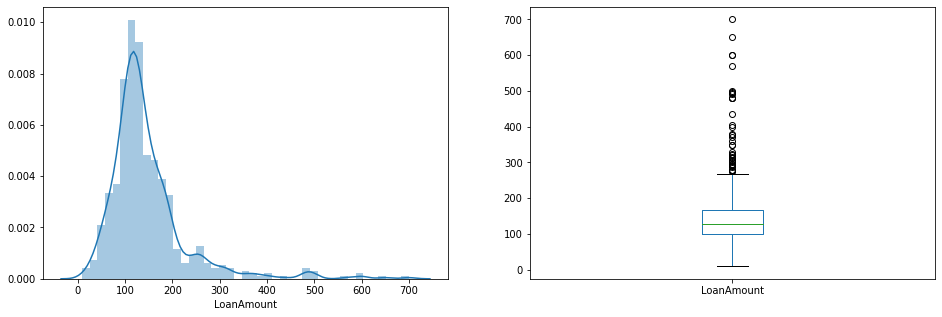

In [100]:
plt.subplot(121)
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

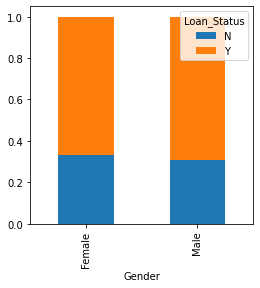

In [101]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

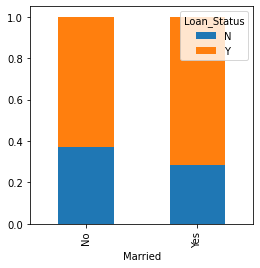

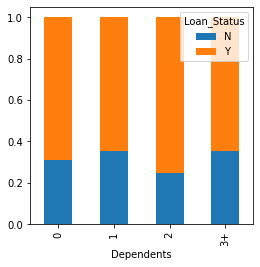

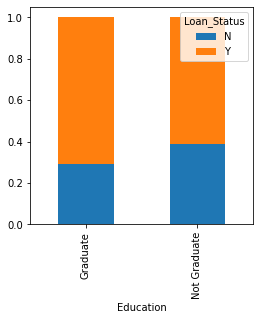

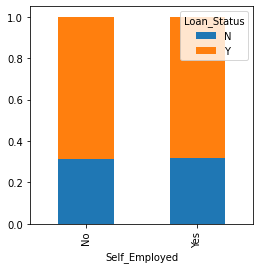

In [102]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

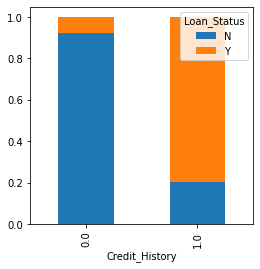

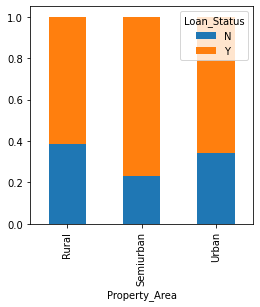

In [103]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

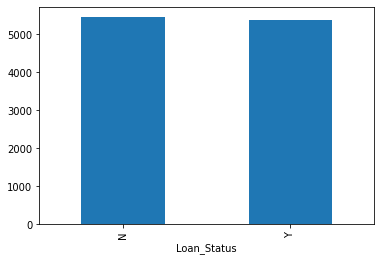

In [104]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

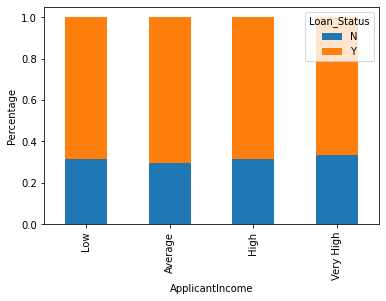

In [105]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

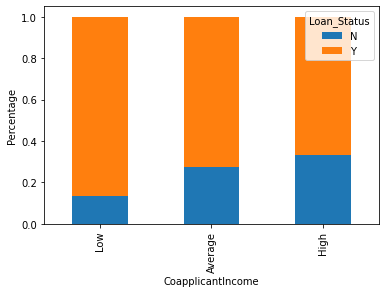

In [106]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.show()

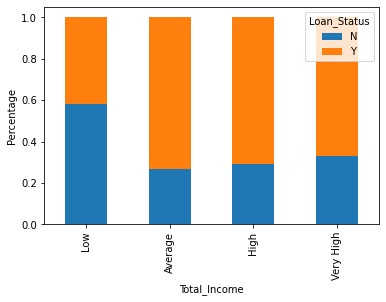

In [107]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

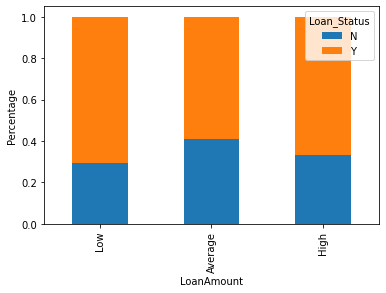

In [108]:
bins=[0,200,400,600]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

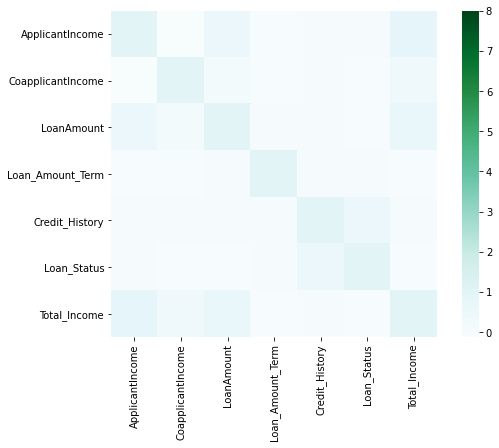

In [109]:
#train= train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)
train['Dependents'].replace('3+',3,inplace=True) 
test['Dependents'].replace('3+',3,inplace= True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
matrix=train.corr() 
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=8,square=True,cmap="BuGn")
plt.show()

In [110]:
train.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [111]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             24
dtype: int64

In [112]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train.isnull().sum() #to check it

Loan_ID                     0
Gender                      0
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             24
dtype: int64

In [113]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train.isnull().sum() 

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             24
dtype: int64

In [114]:
train['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [115]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [116]:
train['LoanAmount'].value_counts()


120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [117]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [118]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             24
dtype: int64

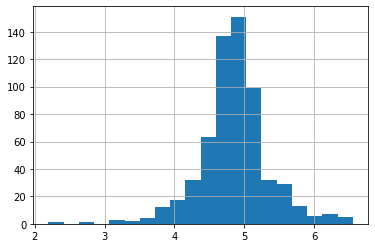

In [119]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [120]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [121]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [122]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
LogisticRegression(C=1.0,class_weight =None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',
random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [124]:
#checking accuracy of our predictions
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)


0.8

In [157]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mean(),inplace=True)


In [139]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,Loan_ID_LP001054,Loan_ID_LP001055,Loan_ID_LP001056,Loan_ID_LP001059,Loan_ID_LP001067,Loan_ID_LP001078,Loan_ID_LP001082,Loan_ID_LP001083,Loan_ID_LP001094,Loan_ID_LP001096,Loan_ID_LP001099,Loan_ID_LP001105,Loan_ID_LP001107,Loan_ID_LP001108,Loan_ID_LP001115,Loan_ID_LP001121,Loan_ID_LP001124,Loan_ID_LP001128,Loan_ID_LP001135,Loan_ID_LP001149,Loan_ID_LP001153,Loan_ID_LP001163,Loan_ID_LP001169,Loan_ID_LP001174,Loan_ID_LP001176,Loan_ID_LP001177,Loan_ID_LP001183,Loan_ID_LP001185,Loan_ID_LP001187,...,Loan_ID_LP002869,Loan_ID_LP002870,Loan_ID_LP002876,Loan_ID_LP002878,Loan_ID_LP002879,Loan_ID_LP002885,Loan_ID_LP002890,Loan_ID_LP002891,Loan_ID_LP002899,Loan_ID_LP002901,Loan_ID_LP002907,Loan_ID_LP002920,Loan_ID_LP002921,Loan_ID_LP002932,Loan_ID_LP002935,Loan_ID_LP002952,Loan_ID_LP002954,Loan_ID_LP002962,Loan_ID_LP002965,Loan_ID_LP002969,Loan_ID_LP002971,Loan_ID_LP002975,Loan_ID_LP002980,Loan_ID_LP002986,Loan_ID_LP002989,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1


In [142]:
test.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
                          ..
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Length: 388, dtype: int64

In [143]:
test.dtypes

ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
                            ...   
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Length: 388, dtype: object

In [160]:
test.isnull().any()

ApplicantIncome            False
CoapplicantIncome          False
LoanAmount                 False
Loan_Amount_Term           False
Credit_History             False
                           ...  
Self_Employed_No           False
Self_Employed_Yes          False
Property_Area_Rural        False
Property_Area_Semiurban    False
Property_Area_Urban        False
Length: 388, dtype: bool

In [159]:
test = test.fillna(method='ffill')


In [161]:
submission=pd.read_csv("/content/drive/My Drive/Datasets/sample_submission_49d68Cx.csv")

In [162]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [167]:
submission['Loan_ID']=test_orignal['Loan_ID']


In [169]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [173]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistics_csv')

In [177]:
submission.head(10)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
5,LP001054,N
6,LP001055,N
7,LP001056,N
8,LP001059,N
9,LP001067,N
